# Base de datos: Datos de diferentes tiendas en USA
## La base de datos tiene contiene los siguientes valores

 Columna | Descripción |
---------| ------------|
 Store ID | Identificador único para cada tienda del registro
 Store_Area | Area de la tienda en yardas
 Items_Available | Numero equivalente a la cantidad de productos diferentes que tiene la tienda
 Daily_Customer_Count | Numero de clientes que registra la tienda en un mes
 Store_Sales | Cantidad de ventas en dolares que registra la tienda



### Definiremos el atributo de prediccion como las ventas en dolas que registran las tienes :  **Store_Sales**
---

In [237]:
# importamos todas las librerias a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [238]:
# ruta de datos
path='datos/Stores.csv'
# dataframe con los datos
df = pd.read_csv(path)
# imprimimos los tipos de datos 
print(df.dtypes)

Store ID                int64
Store_Area              int64
Items_Available         int64
Daily_Customer_Count    int64
Store_Sales             int64
dtype: object


 Observamos que todas las variables son del tipo **int64**, por lo tanto, podemos analizar la Correlación de Pearson para medir la dependecia lineal.

In [239]:
coeficiente_pearson, valor_p = stats.pearsonr(df['Store_Area'], df['Store_Sales'])
print("Para el atributo Store_Area el coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)
coeficiente_pearson, valor_p = stats.pearsonr(df['Items_Available'], df['Store_Sales'])
print("Para el atributo Items_Available el coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)
coeficiente_pearson, valor_p = stats.pearsonr(df['Daily_Customer_Count'], df['Store_Sales'])
print("Para el atributo Daily_Customer_Count el coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)


Para el atributo Store_Area el coeficiente de la Correlación de Pearson es 0.09747379539480504  con un valor de P = 0.0034936646150500283
Para el atributo Items_Available el coeficiente de la Correlación de Pearson es 0.0988494347639308  con un valor de P = 0.0030563567566742117
Para el atributo Daily_Customer_Count el coeficiente de la Correlación de Pearson es 0.008628707670585094  con un valor de P = 0.7964612545095916


Notamos que los atributos **Store_Area** y **Items_Available** tienen una evidencia moderada de que la correlacion es significativa y el atributo **Daily_Customer_Count** no muestra evidencia de que la correlacion sea significativa. Por lo tanto, la correlacion lineal de los primeros dos atributos mencionados (con respecto a Store_Sales) serán nuestra primera opcion para un *modelo de regresion lineal multiple*.

## Primera opción de modelo:

Funcion de modelo -> Store_Sales =  48567.77884482473  +  -39.03556985939915 *Store_Area +  38.234154638297674 *Items_Available +  0.8046133013172998 *Daily_Customer_Count


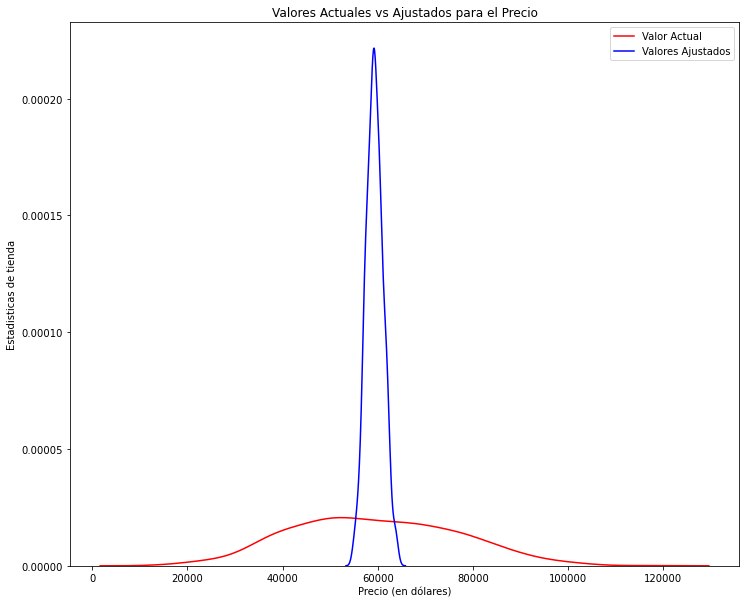

El valor de R-cuadrado es:  0.0106480710451613
El valor MSE es:  292048560.589829


In [240]:
#Modelo de regresion lineal multiple
lm = LinearRegression()

Z = df[['Store_Area', 'Items_Available', 'Daily_Customer_Count']]

lm.fit(Z,df['Store_Sales'])
print('Funcion de modelo -> Store_Sales = ',lm.intercept_,' + ',lm.coef_[0],'*Store_Area + ',lm.coef_[1],'*Items_Available + ',lm.coef_[2],'*Daily_Customer_Count')
Y_hat = lm.predict(Z)
plt.figure(figsize=(12, 10))

ax1 = sns.kdeplot(df['Store_Sales'], color="r", label="Valor Actual")
sns.kdeplot(Y_hat, color="b", label="Valores Ajustados" , ax=ax1)

plt.title('Valores Actuales vs Ajustados para el Precio')
plt.xlabel('Precio (en dólares)')
plt.ylabel('Estadisticas de tienda')

plt.legend(loc='upper right')

plt.show()
plt.close()
print('El valor de R-cuadrado es: ', lm.score(Z, df['Store_Sales']))
print('El valor MSE es: ', mean_squared_error(df['Store_Sales'], Y_hat))

## Segunda opción de modelo:

In [241]:
#definimos funcion polonomial
def GraficaPolinomial(modelo, variable_independiente, variable_dependiente, Nombre):
    nuevo_x = np.linspace(15, 55, 100)
    nuevo_y = modelo(nuevo_x)

    plt.plot(variable_independiente, variable_dependiente, '.', nuevo_x, nuevo_y, '-')
    plt.title('Ajuste Polinomial con Matplotlib para Precio ~ ' + Nombre)
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    figura = plt.gcf()
    plt.xlabel(Nombre)
    plt.ylabel('Precio de los Automóviles')

    plt.show()
    plt.close()

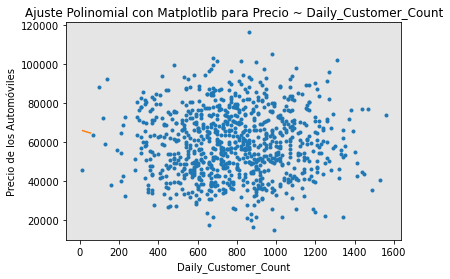

El valor de R-cuadrado es:  0.0017815216464545092
El valor de MSE es:  294665893.1218699


In [242]:
#Modelo de regresion lineal simple
X = df['Daily_Customer_Count']
Y = df['Store_Sales']
# En este caso se usará un polinomio de tercer orden o cúbico 
f = np.polyfit(X, Y, 3)
p = np.poly1d(f)
GraficaPolinomial(p, X, Y, 'Daily_Customer_Count')
np.polyfit(X, Y, 3)
r_cuadrado = r2_score(Y, p(X))
print('El valor de R-cuadrado es: ', r_cuadrado)
print('El valor de MSE es: ',mean_squared_error(df['Store_Sales'], p(X)))

## Regresión Lineal Múltiple versus Regresión Polinomial

- $MSE$: El $MSE$ para la regresión lineal múltiple es más pequeño que el $MSE$ para la regresión polinomial.
- $R^2$: El $R^2$ para la regresión lineal múltiple es más grande que el $R^2$ para la regresión polinomial.

### Por lo tanto, escogeremos el modelo de regresion lineal multiple como el mejor modelo.